Red wine과 White wine 분류하기

# 임포트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 가져오기

In [2]:
!wget https://github.com/Chanmi-K/Python/raw/main/Data/wine_data.zip

--2022-07-03 02:12:17--  https://github.com/Chanmi-K/Python/raw/main/Data/wine_data.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Chanmi-K/Python/main/Data/wine_data.zip [following]
--2022-07-03 02:12:17--  https://raw.githubusercontent.com/Chanmi-K/Python/main/Data/wine_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26238 (26K) [application/zip]
Saving to: ‘wine_data.zip’

wine_data.zip       100%[===================>]  25.62K  --.-KB/s    in 0.002s  

2022-07-03 02:12:18 (16.5 MB/s) - ‘wine_data.zip’ saved [26238/26238]



In [3]:
!unzip wine_data.zip

Archive:  wine_data.zip
  inflating: wine_data.csv           


In [4]:
wine_df = pd.read_csv('wine_data.csv')
wine_df

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


# CodeBook

* alcohol : 알코올 도수
* sugar : 당도
* pH : 산성도
* class : 타깃값. 0:레드와인, 1:화이트와인

# 데이터 살펴보기

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


총 6497개의 샘플. 4개 열 모두 실숫값

null 값은 없음

In [6]:
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


# 훈련 세트와 테스트 세트 나누기

In [7]:
data = wine_df[['alcohol','sugar','pH']].to_numpy()
target = wine_df['class'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [9]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


# 결정 트리

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.996921300750433
0.8584615384615385


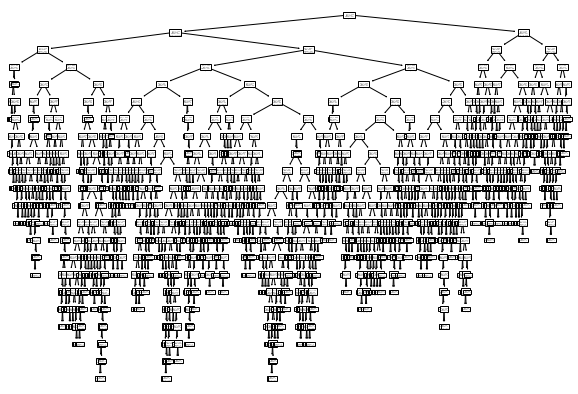

In [11]:
#트리 그림 그려보기
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

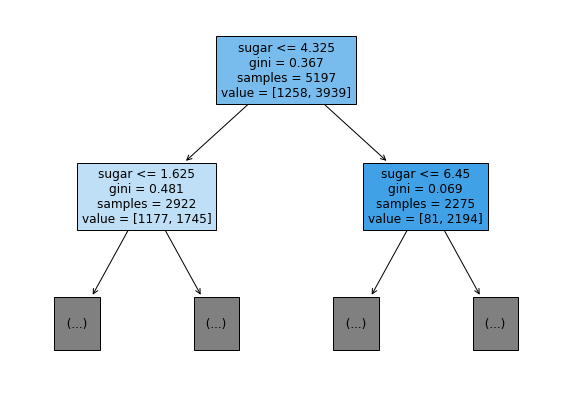

In [12]:
#루트 노드와 첫 번째 노드만 출력
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

- 테스트 조건 (sugar)
- 불순도 (gini)
- 총 샘플 수 (samples)
- 클래스별 샘플 수 (value)

- 왼쪽 화살표 : 조건 만족 Yes
- 오른쪽 화살표 : 조건 불만족 No

## 결정 트리 가지치기

In [13]:
#최대 깊이 3으로 지정
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


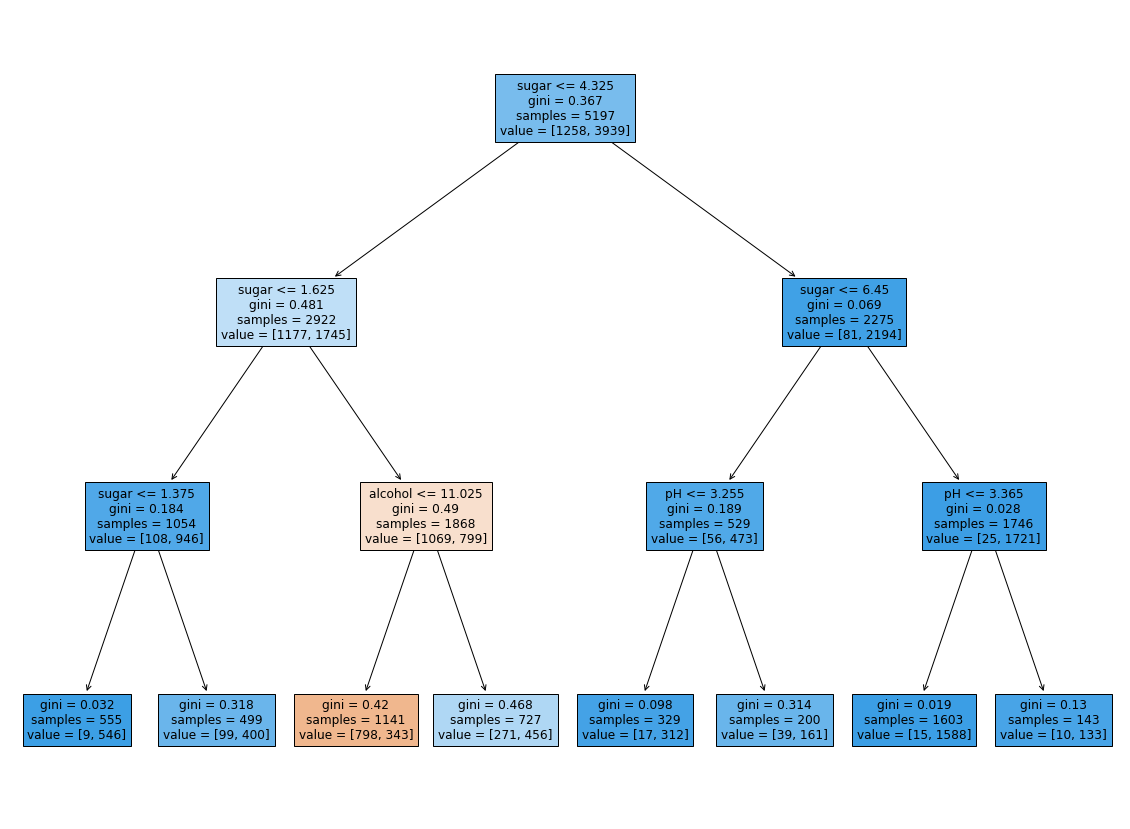

In [14]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

왼쪽에서 세 번째에 있는 리프 노드에 도달해야지만 레드 와인이라고 분류

즉 당도가 1.625보다 크고 4.325보다 작은 와인 중 알코올 도수가 11.025와 같거나 작은 것이 레드 와인이다. 

그 외에는 모두 화이트 와인으로 예측했다

In [15]:
#특성 중요도 출력
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


당도가 0.87 정도로 특성 중요도가 가장 높다

## 교차 검증

k-폴드 교차 검증

In [16]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00620341, 0.00881457, 0.00482345, 0.00406265, 0.00330257]), 'score_time': array([0.00114202, 0.00112724, 0.00104427, 0.00070357, 0.000597  ]), 'test_score': array([0.84230769, 0.83365385, 0.84504331, 0.8373436 , 0.8479307 ])}


In [17]:
#검증 폴드의 점수 구하기
print(np.mean(scores['test_score']))

0.8412558303102096


## 하이퍼파라미터 튜닝

그리드 서치 : 하이퍼파라미터 탐색과 교차 검증을 한번에 수행

랜덤 서치 : 매개변수 샘플링 (scipy 사용)

### 그리드 서치

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
params = {'min_impurity_decrease':np.arange(0.0001, 0.001, 0.0001),
          'max_depth':range(5,20,1),
          'min_samples_split':range(2,100,10)}

In [20]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [21]:
#최상의 매개변수 조합
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [22]:
#최상의 교차 검증 점수
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


### 랜덤 서치

In [23]:
from scipy.stats import uniform, randint

- uniform : 실숫값
- randint : 정숫값

In [24]:
params = {'min_impurity_decrease':uniform(0.0001, 0.001),
          'max_depth':randint(20,50),
          'min_samples_split':randint(2,25),
          'min_samples_leaf':randint(1,25)}

* 'min_impurity_decrease' : 0.0001에서 0.001 사이의 실숫값
* 'max_depth' : 20에서 50사이의 정수
* 'min_samples_split' : 2에서 25 사이의 정수
* 'min_samples_leaf' : 1에서 25 사이의 정수

In [25]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6d2d3ad650>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6d2f558090>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6d2f558550>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6d2d3adcd0>},
                   random_state=42)

In [26]:
#최상의 매개변수 조합
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [27]:
#최상의 교차 검증 점수
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [28]:
#최적의 모델을 최종 모델로 결정하고 테스트 세트의 성능 확인
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86


# 트리의 앙상블

## 랜덤 포레스트

여러 개의 결정 트리를 랜덤하게 만들어 각 결정 트리의 예측을 사용해 최종 예측을 만든다

데이터 샘플 : 부트스트랩 샘플. 중복 허용 랜덤 추출

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [30]:
#훈련 세트에 훈련한 후 특성 중요도 출력
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [31]:
#자체적으로 모델을 평가하는 점수 얻기
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


OOB 점수를 사용하면 교차 검증을 대신 할 수 있어서 결과적으로 훈련 세트에 더 많은 샘플을 사용할 수 있다

## 엑스트라 트리

각 결정 트리를 만들 때 전체 훈련 세트를 사용

노드 무작위 분할

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [33]:
#훈련 세트에 훈련한 후 특성 중요도 출력
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


## 그레이디언트 부스팅

깊이가 얕은 결정 트리를 여러 개 사용

경사 하강법 사용

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [35]:
#결정 트리 개수 100 -> 500으로 늘리고, 학습률 0.1 -> 0.2로 늘리기
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [36]:
#특성 중요도 출력
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


## 히스토그램 기반 그레이디언트 부스팅

정형 데이터를 다루는 머신러닝 알고리즘 중에 가장 인기가 높은 알고리즘

입력 특성을 256개의 구간으로 나눠 최적의 분할 빠르게 찾기

### HistGradientBoostingClassifier

사이킷런 제공

In [37]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target,
                        return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [38]:
#특성 중요도 계산
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target,
                                n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [39]:
#테스트 세트에서 특성 중요도 계산
result = permutation_importance(hgb, test_input, test_target,
                                n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [40]:
#테스트 세트에서의 성능 최종 확인
hgb.score(test_input, test_target)

0.8723076923076923

### XGBoost

그레이디언트 부스팅 구현한 라이브러리

tree_method 를 'hist'로 지정하면 히스토그램 기반 그레이디언트 부스팅 사용 가능

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target,
                        return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8824322471423747 0.8726214185237284


### LightGBM

마이크로소프트에서 만든 라이브러리

In [42]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9338079582727165 0.8789710890649293
